# Detekcija prevara s kredintim karticama

## Eksplartorna analiza podataka

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)
import matplotlib.gridspec as gridspec



In [3]:
df=pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Skup podataka

U skupu podataka imamo varijable:1. __Time__-Vrijeme transkakcije,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;2. __V1-V28__ neimenovanih normaliziranih svojstva dobivenih PAC-algoritmom iz nekih realnih podatak,<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;3.__Amount__-iznos transakcije,<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;4.__Class__- 1 ukoliko je transkacija Prevara
    

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Nebalansirana raspodjela  podaka između klasa

Podaci sa kojima radimo su podaci kojima su iskrivljeni(tzv.Skewd),što je česta pojava u detekciji prijevara.Imamo puno primjera koji ulaze u klasu ne prevare i malo prevara.




Broj ispravnih transakcija : 284315
Broj prevara: 492


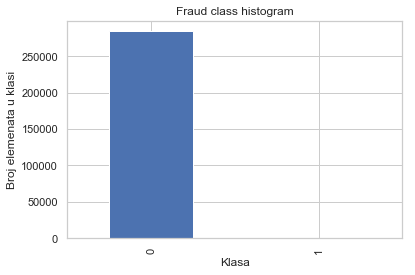

In [6]:
broj_klasa = pd.value_counts(df['Class'], sort = True).sort_index()
broj_klasa.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Klasa")
plt.ylabel("Broj elemenata u klasi")
nonfraud = df.loc[ df['Class'] == 0, : ]
fraud = df.loc[ df['Class'] == 1, : ]

print('Broj ispravnih transakcija : ' + str(len(nonfraud)))
print('Broj prevara: ' + str(len(fraud)))

#### Prijevare tokom vremena

Provjeravamo postojeli mozda pravilnosti kod broja prijevara i vremena kada se one događaju.

In [7]:
print ("Prevara")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())


Prevara
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


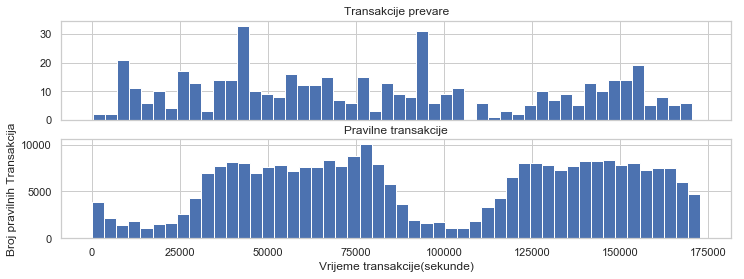

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Transakcije prevare')
plt.ylabel('Transakcija prijevare')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Pravilne transakcije')

plt.xlabel('Vrijeme transakcije(sekunde)')
plt.ylabel('Broj pravilnih Transakcija')
plt.show()

## Skaliranje Time i Amout
    Skaliramo varijable Time i Amount pošto one nisu skalirane

In [9]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!



Primječujemo da nema jasne pravilnosti izmedu broja prijevara i vremena kada se one događaju.

## Analiza svojstava 

In [10]:
v_znacajke= df.iloc[:,0:30].columns

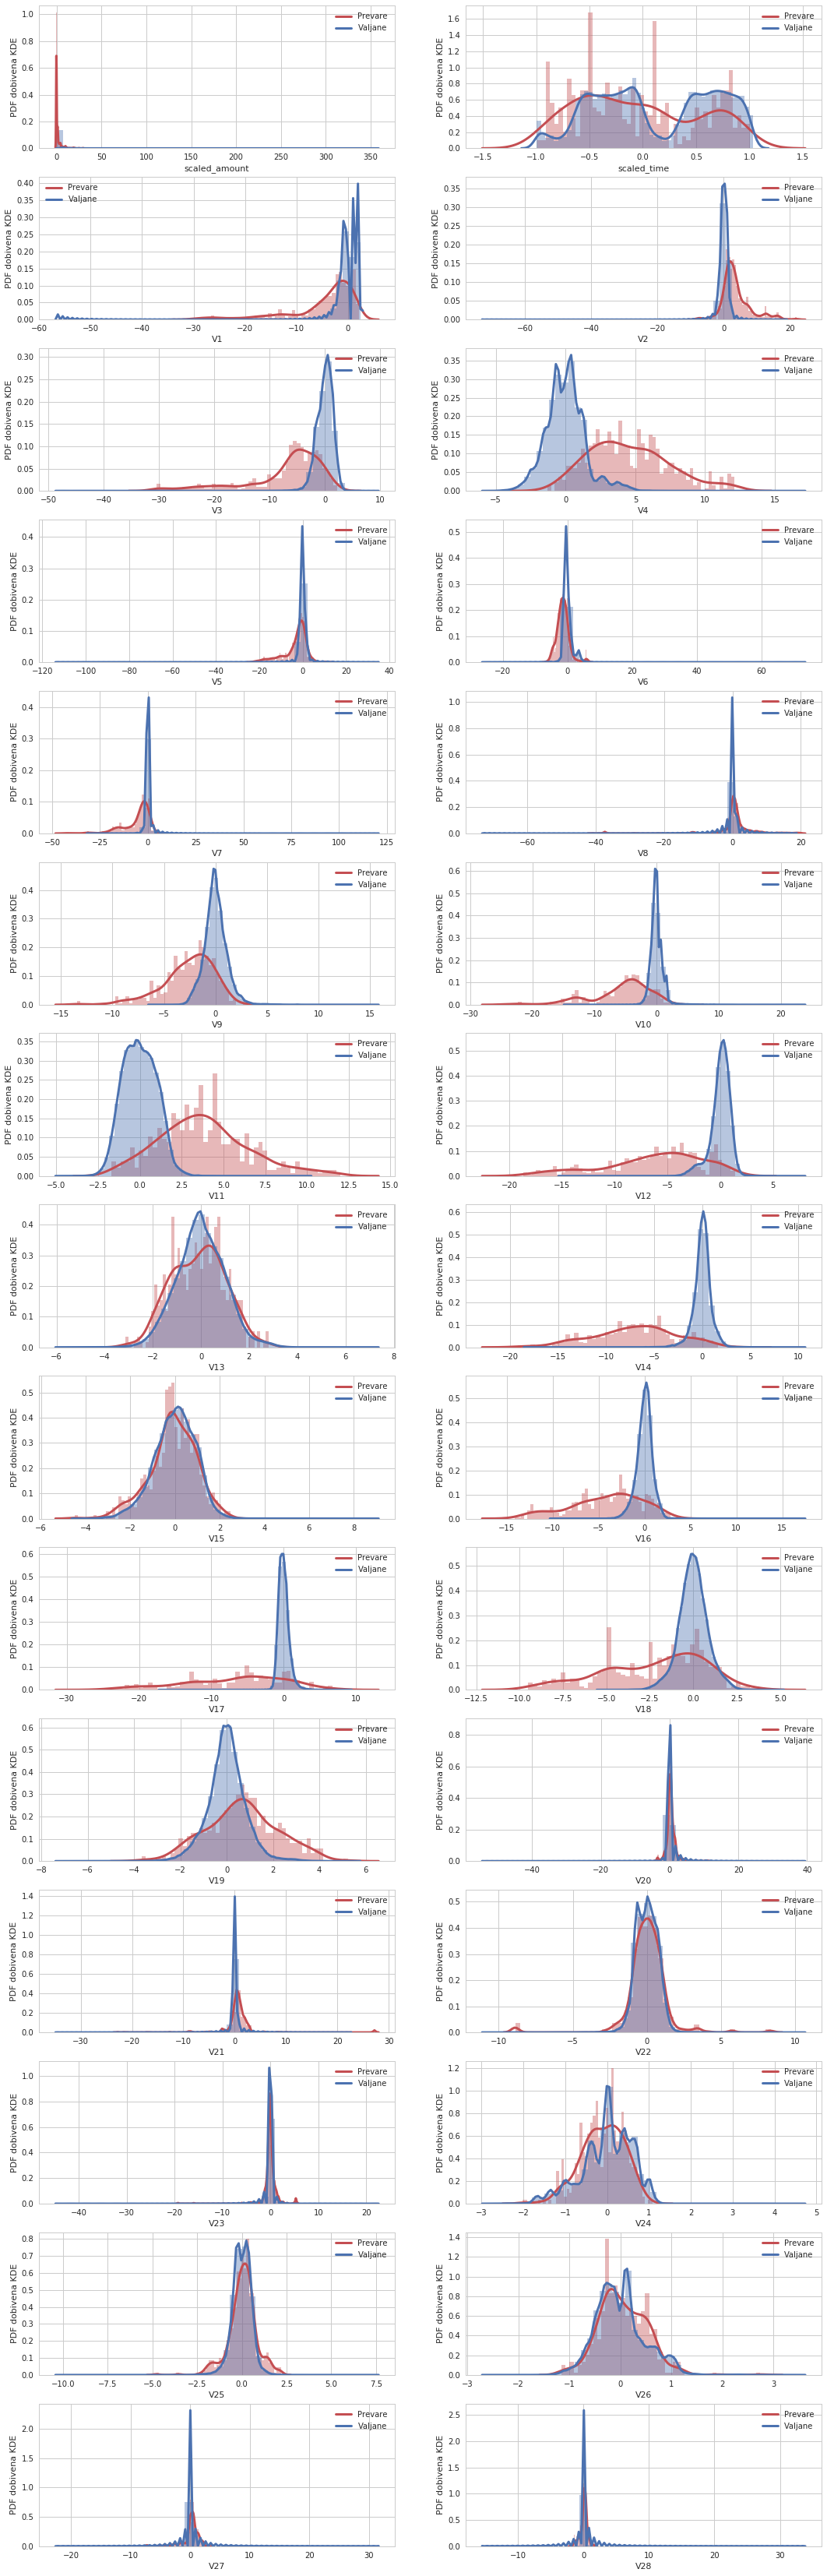

In [11]:
plt.figure(figsize=(18,30*2))
gs = gridspec.GridSpec(15, 2)
for i, cn in enumerate(df[v_znacajke]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50,color='r',kde_kws={"color": "r", "lw": 3, "label": "Prevare"})
    sns.distplot(df[cn][df.Class == 0], bins=50,color='b',kde_kws={"color": "b", "lw": 3, "label": "Valjane"})
    ax.set_ylabel('PDF dobivena KDE')
       
plt.show()

### Interpretacija grafova

Na gornjim grafovima nalaze se procjene funkcija gustoća svih varijabli po klasama,što su one razdvojenije varijabla će biti važnija u klasifikaciji novih primjera.

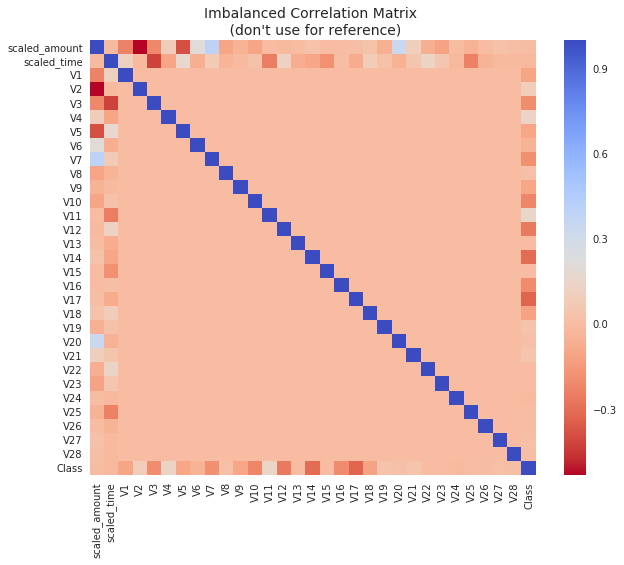

In [43]:
f, ax1 = plt.subplots(1, 1, figsize=(10,8))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


plt.show()

Na slici se vidi da ne postoji koreliranost između V1-V28 zbog toga što je na njima provedena PCA algoritam,vidljivo je također da su neke varijable više,neke manje korelirane sa klasom koja sadrži informacije o valjanosti transakcija

## Podjela na traning i test set

Djelimo skup podataka na 5 razičitih trening i test setova (za kasniju CV), koji čuvaju postotak uzoraka u svakoj klasi.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))



No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


## Odabir značajki

Koristimo ANOVA F-vrijednost kao mjeru povezanosti značajke s ciljnom varijablom te odabiremo uzimamo u obzir varijable na dva načina, odabirom K-najboljih i dodjeljivanjem granice lažnih otkriča

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split


In [46]:
def replaceZeroes(data):
  min_nonzero = np.min(data[np.nonzero(data)])
  data[data == 0] = min_nonzero
  return data

X_train =  X.iloc[train_index]
y_train = y.iloc[train_index]
k_best=20
selector = SelectKBest(f_classif, k=k_best)
selector.fit(X_train, y_train)
pvrjednosti=selector.pvalues_
pvrjednosti=replaceZeroes(pvrjednosti)
scores = -np.log10(pvrjednosti)
indices = np.argsort(scores)[::-1]


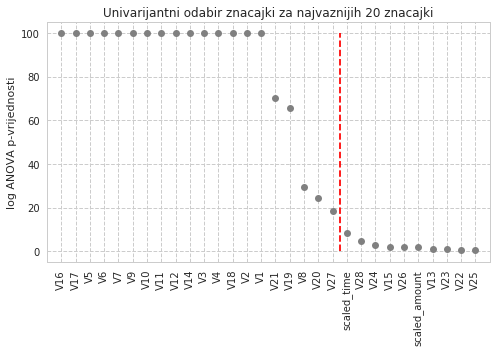

In [17]:
plt.figure(figsize=(7,5))

plt.plot(range(X_train.shape[1]), scores[indices], 'o', color='gray')

plt.title('Univarijantni odabir znacajki za najvaznijih 20 znacajki')
plt.ylabel('log ANOVA p-vrijednosti')
plt.xlim([-1, X_train.shape[1]])
plt.xticks(range(X_train.shape[1]), df.drop('Class',axis=1).columns.values[indices], rotation=90)
plt.vlines(k_best-0.5, 0, np.max(scores), color='red', linestyle='--')
plt.grid(True,linestyle='--')
plt.tight_layout()

# Hack za bojanje noise znacajki u crveno
[ i.set_color("red") for i in plt.gca().get_xticklabels() if i.get_text()[:5] == 'noise' ]

plt.show()

In [18]:
from sklearn.feature_selection import SelectFdr, f_classif

In [19]:

X_train =  X.iloc[train_index]
y_train = y.iloc[train_index]
k_best=20
selector = SelectFdr(f_classif, alpha=0.05)
selector.fit(X_train, y_train)
pvrjednosti=selector.pvalues_
pvrjednosti=replaceZeroes(pvrjednosti)
scores = -np.log10(pvrjednosti)
indices = np.argsort(scores)[::-1] # Vrati indekse koji sortiraju polje (obratno)

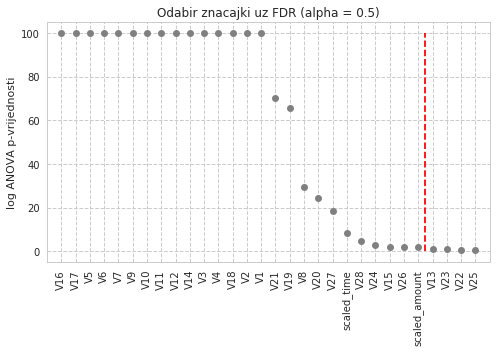

In [21]:
plt.figure(figsize=(7,5))

plt.plot(range(X_train.shape[1]), scores[indices], 'o', color='gray')

plt.title('Odabir znacajki uz FDR (alpha = 0.5)')
plt.ylabel('log ANOVA p-vrijednosti')
plt.xlim([-1, X_train.shape[1]])
plt.xticks(range(X_train.shape[1]), df.drop('Class',axis=1).columns.values[indices], rotation=90)
plt.vlines(np.sum(selector.get_support())-0.5, 0, np.max(scores), color='red', linestyle='--')
plt.grid(True,linestyle='--')
plt.tight_layout()

# Hack za bojanje noise znacajki u crveno
[ i.set_color("red") for i in plt.gca().get_xticklabels() if i.get_text()[:5] == 'noise' ]

plt.show()

# Odabiremo značajke na temelju važnosti u Random Forest Classifieru

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)

forest = RandomForestClassifier(n_estimators=500,random_state=0,n_jobs=-1) # Promjeni n_jobs za paralelizaciju!

X_train = df_train.drop('Class',axis=1)
y_train = df_train['Class']

forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] # Vrati indekse koji sortiraju polje (obratno)

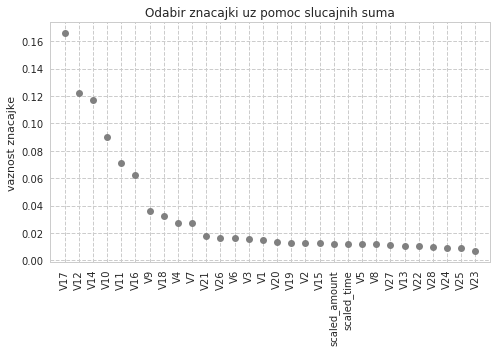

In [33]:
plt.figure(figsize=(7,5))

plt.plot(range(X_train.shape[1]), importances[indices], 'o', color='gray')

plt.title('Odabir znacajki uz pomoc slucajnih suma')
plt.ylabel('vaznost znacajke')
plt.xlim([-1, X_train.shape[1]])
plt.xticks(range(X_train.shape[1]), df.drop('Class',axis=1).columns.values[indices], rotation=90)
plt.tight_layout()

plt.grid(True,linestyle='--')
plt.show()

# Balansiranje nebalansiranih podataka

Radimo istu analizu podataka kao i gore samo za balansiran skup podatka

In [40]:
data=df
notfraud=data.loc[data['Class']==0,:]
fraud=data.loc[data['Class']==1,:]

In [41]:
N=fraud.shape[0]
notfraud.shape[0]
#undersampling
notfraud=notfraud.sample(n=N)
podaci=pd.concat([fraud,notfraud], ignore_index=True)


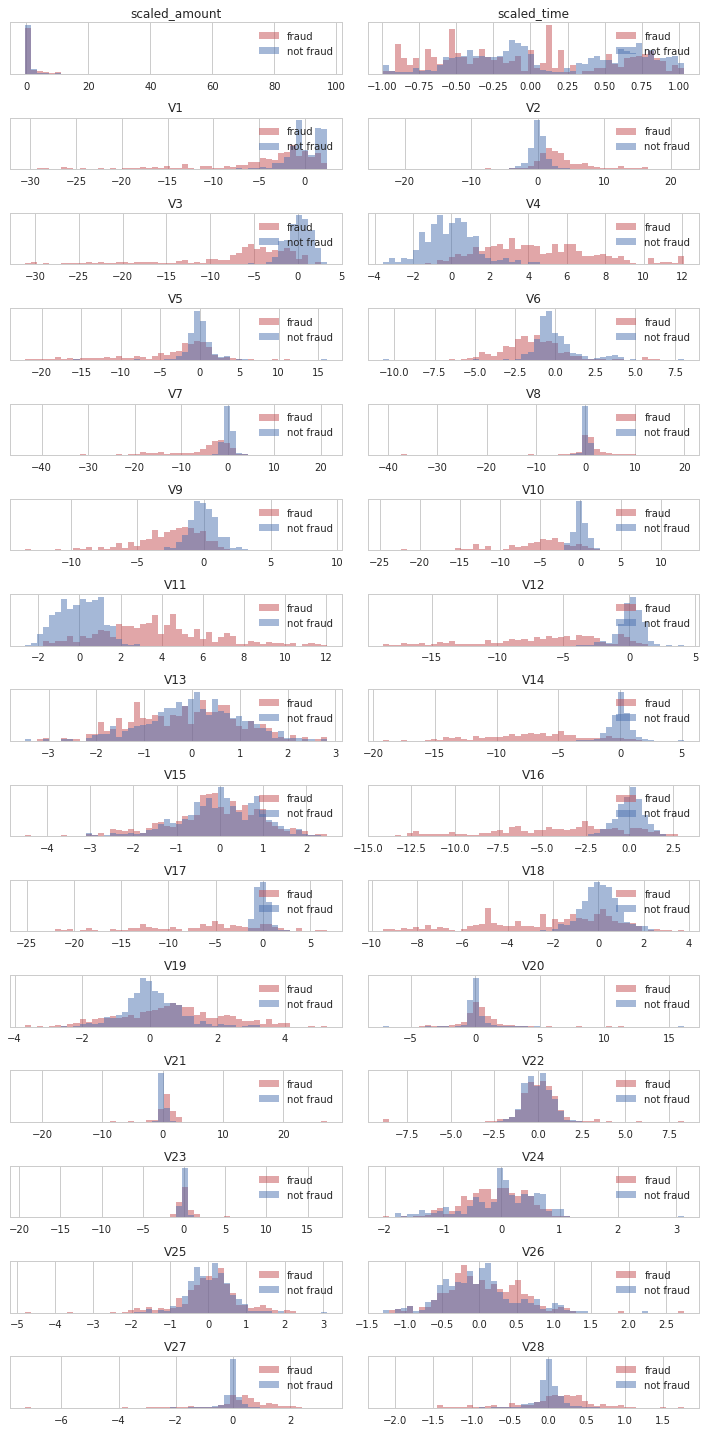

In [42]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
ax = axes.ravel() # axes are 2-dimensional so we unfold them
for i in range(30):
    _, bins = np.histogram(podaci.iloc[:,i], bins=50)
    ax[i].hist(fraud.iloc[:,i], bins=bins, color='r', alpha=.5, label='fraud')
    ax[i].hist(notfraud.iloc[:,i], bins=bins, color='b', alpha=.5, label='not fraud')
    ax[i].set_title(podaci.columns.values[i])
    ax[i].set_yticks(()) # remove ticks on y-axis
    ax[i].legend(loc='upper right')
fig.tight_layout()

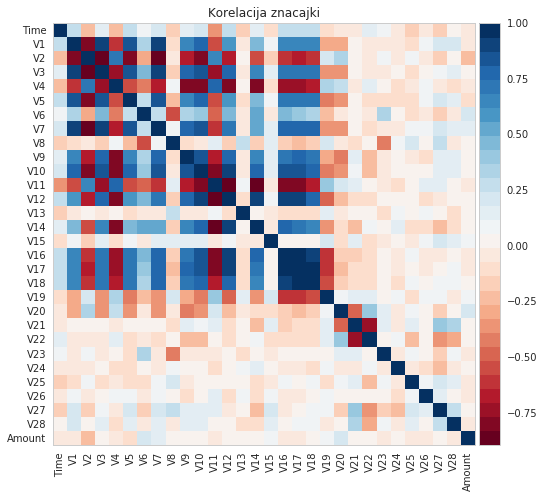

In [39]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

podaci_corr=podaci.drop('Class', axis=1).corr()
cmap = cm.get_cmap('RdBu', 30)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iax = ax.imshow(podaci_corr, interpolation="nearest", cmap=cmap)
ax.grid(False)
ax.set(title='Korelacija znacajki')
ax.set_xticks(range(podaci_corr.shape[1]))
ax.set_xticklabels(podaci.drop('Class',axis=1).columns.values, rotation=90)
ax.set_yticks(range(podaci_corr.shape[1]))
ax.set_yticklabels(podaci.drop('Class',axis=1).columns.values)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(iax,cax)
plt.show()

## Podjela na training i test set balansiranih(undersampled) podataka

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(podaci['Class'].value_counts()[0]/len(podaci) * 100,2), '% of the dataset')
print('Frauds', round(podaci['Class'].value_counts()[1]/len(podaci) * 100,2), '% of the dataset')

X = podaci.drop('Class', axis=1)
y = podaci['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.49936468 0.50063532]
[0.50253807 0.49746193]


In [50]:
def replaceZeroes(data):
  min_nonzero = np.min(data[np.nonzero(data)])
  data[data == 0] = min_nonzero
  return data

X_train =  X.iloc[train_index]
y_train = y.iloc[train_index]
k_best=20
selector = SelectKBest(f_classif, k=k_best)
selector.fit(X_train, y_train)
pvrjednosti=selector.pvalues_
pvrjednosti=replaceZeroes(pvrjednosti)
scores = -np.log10(pvrjednosti)
indices = np.argsort(scores)[::-1]


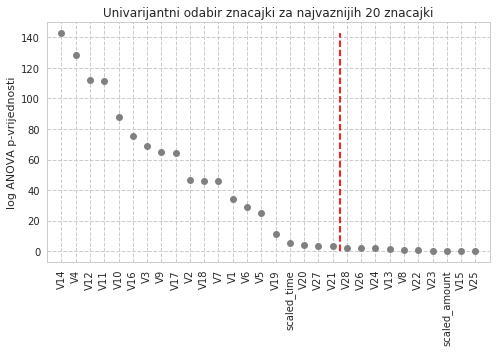

In [51]:
plt.figure(figsize=(7,5))

plt.plot(range(X_train.shape[1]), scores[indices], 'o', color='gray')

plt.title('Univarijantni odabir znacajki za najvaznijih 20 znacajki')
plt.ylabel('log ANOVA p-vrijednosti')
plt.xlim([-1, X_train.shape[1]])
plt.xticks(range(X_train.shape[1]), df.drop('Class',axis=1).columns.values[indices], rotation=90)
plt.vlines(k_best-0.5, 0, np.max(scores), color='red', linestyle='--')
plt.grid(True,linestyle='--')
plt.tight_layout()

# Hack za bojanje noise znacajki u crveno
[ i.set_color("red") for i in plt.gca().get_xticklabels() if i.get_text()[:5] == 'noise' ]

plt.show()

In [52]:

X_train =  X.iloc[train_index]
y_train = y.iloc[train_index]
k_best=20
selector = SelectFdr(f_classif, alpha=0.05)
selector.fit(X_train, y_train)
pvrjednosti=selector.pvalues_
pvrjednosti=replaceZeroes(pvrjednosti)
scores = -np.log10(pvrjednosti)
indices = np.argsort(scores)[::-1] # Vrati indekse koji sortiraju polje (obratno)

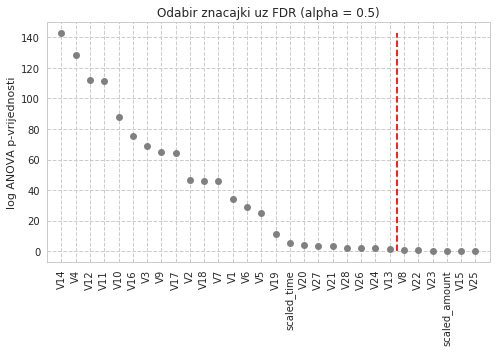

In [53]:
plt.figure(figsize=(7,5))

plt.plot(range(X_train.shape[1]), scores[indices], 'o', color='gray')

plt.title('Odabir znacajki uz FDR (alpha = 0.5)')
plt.ylabel('log ANOVA p-vrijednosti')
plt.xlim([-1, X_train.shape[1]])
plt.xticks(range(X_train.shape[1]), df.drop('Class',axis=1).columns.values[indices], rotation=90)
plt.vlines(np.sum(selector.get_support())-0.5, 0, np.max(scores), color='red', linestyle='--')
plt.grid(True,linestyle='--')
plt.tight_layout()

# Hack za bojanje noise znacajki u crveno
[ i.set_color("red") for i in plt.gca().get_xticklabels() if i.get_text()[:5] == 'noise' ]

plt.show()

In [54]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)

forest = RandomForestClassifier(n_estimators=500,random_state=0,n_jobs=-1) # Promjeni n_jobs za paralelizaciju!

X_train = X.iloc[train_index]
y_train = y.iloc[train_index]

forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] # Vrati indekse koji sortiraju polje (obratno)

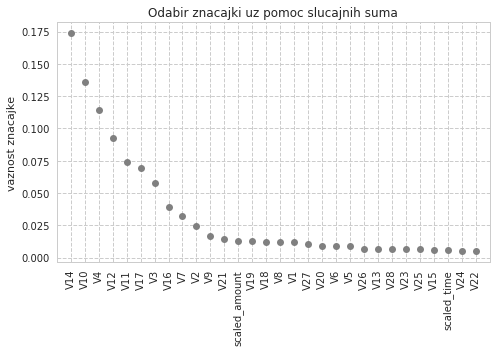

In [55]:
plt.figure(figsize=(7,5))

plt.plot(range(X_train.shape[1]), importances[indices], 'o', color='gray')

plt.title('Odabir znacajki uz pomoc slucajnih suma')
plt.ylabel('vaznost znacajke')
plt.xlim([-1, X_train.shape[1]])
plt.xticks(range(X_train.shape[1]), df.drop('Class',axis=1).columns.values[indices], rotation=90)
plt.tight_layout()

plt.grid(True,linestyle='--')
plt.show()

## Detekcija Anomalije

Ukoliko su podaci ovako neravnomjerno raspodjljeni radimo Dekciju anomalije (tzv. Anomaly detection).
Algoritmi za Detekciju anomalija su različitI,neke koje nalazimo u litereturi su:

    Jednoklasni SVM
    Neural networks
    Bayesove mreže
    Skriveni Markovljevi modeli
    Klaster analiza bazirana na outliler detekciji